<a href="https://colab.research.google.com/github/Trrunghau/Trrunghau/blob/homework/handwrite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

.. 4


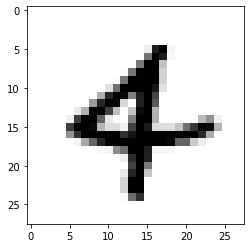

In [95]:
hinh = train_images[150]
import matplotlib.pyplot as plt

plt.imshow(hinh,cmap = plt.cm.binary)
plt.show
print('..',train_labels[150])


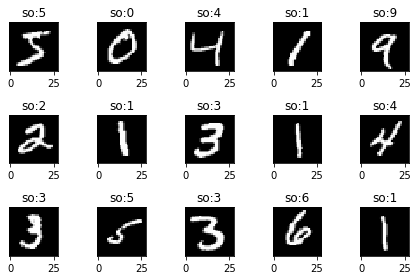

In [96]:
for i in range(15):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i],cmap='gray',interpolation='none')
  plt.title('so:{}'.format(train_labels[i]))
  plt.xticks
  plt.yticks([])

In [97]:
from keras import models
from keras.layers import Dense

In [98]:
from keras.models.cloning import Sequential

model=Sequential()
model.add(Dense(512,activation='relu',input_shape = (28*28,),name='layout1'))
model.add(Dense(10,activation='softmax',name='layoutN'))  # 10 layout
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [99]:
train_images=train_images.reshape((60000,28*28)) # đổi đầu vào thành 1 dãy
train_images=train_images.astype('float32')/255 # đổi kiểu int sang float
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

from keras.utils import to_categorical  # chuyển output sang số 1 nổi, 1 lần  
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [100]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics= ['accuracy'])
model.fit(train_images,train_labels,epochs=10,batch_size=128)
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('độ chính xác:',test_acc)
print('hàm mất mát',test_loss)

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2676 - accuracy: 0.9235
Epoch 2/10
469/469 [==============================] - 5s 12ms/step - loss: 0.1084 - accuracy: 0.9682
Epoch 3/10
469/469 [==============================] - 5s 12ms/step - loss: 0.0715 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0514 - accuracy: 0.9845
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0384 - accuracy: 0.9886
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0282 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0218 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0172 - accuracy: 0.9952
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0129 - accuracy: 0.9967
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0600 - accuracy

In [101]:
model.save('model1.h5')

In [102]:
from keras.models import load_model
model11 = load_model('model1.h5')
model11.summary()
print(model11.predict([test_images]))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layout1 (Dense)             (None, 512)               401920    
                                                                 
 layoutN (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 3ms/step
[[1.2778486e-09 1.1976552e-10 4.5401613e-08 ... 9.9999279e-01
  8.0714777e-09 1.6928600e-07]
 [7.3252399e-10 4.1047361e-08 9.9999994e-01 ... 2.2165367e-19
  2.0863766e-09 1.8254326e-17]
 [4.8595282e-08 9.9974012e-01 5.3359396e-05 ... 4.1978901e-06
  1.9321007e-04 1.4069821e-08]
 ...
 [1.4886528e-17 3.2979163e-14 3.0972147e-17 ... 5.4992894e-10
  7.4752460e-10 2.5496863e-07]
 [7.9171600e

1/1 [==============================] - 0s 87ms/step
Giá trị dự đoán:  2


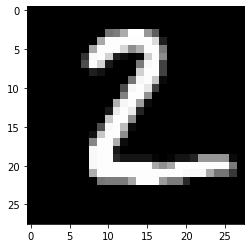

In [103]:
plt.imshow(test_images[1].reshape(28,28), cmap='gray')
import numpy as np
y_predict = model11.predict(test_images[1].reshape(1,28*28))
print('Giá trị dự đoán: ', np.argmax(y_predict))